<a href="https://colab.research.google.com/github/gayatripardeshi17/4th_SEM_PROJECT/blob/main/sign_language_traslation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch    #used for creating and running deep learning models.
import torch.nn as nn  ## Module for building neural networks
import pandas as pd #helps handle structured data, like rows and columns in Excel
import numpy as np  #for math calculations (like working with arrays).
import matplotlib.pyplot as plt   #creating graphs
from sklearn.model_selection import train_test_split  #splits the data into training and testing parts
from torch.utils.data import Dataset, DataLoader  #organize data for training models
from torchvision.transforms import transforms  ## For changing (transforming) images (like resizing, rotating, etc.)
from PIL import Image   #opens images.
from tqdm import tqdm   ## Shows a progress bar when running loops

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'    #torch.cuda.is_available(): This checks if your computer has a GPU (called CUDA)

# Import Data

In [50]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! kaggle datasets download -d datamunge/sign-language-mnist

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/sign-language-mnist.zip

Archive:  /content/sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train = pd.read_csv('/content/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<Axes: ylabel='count'>

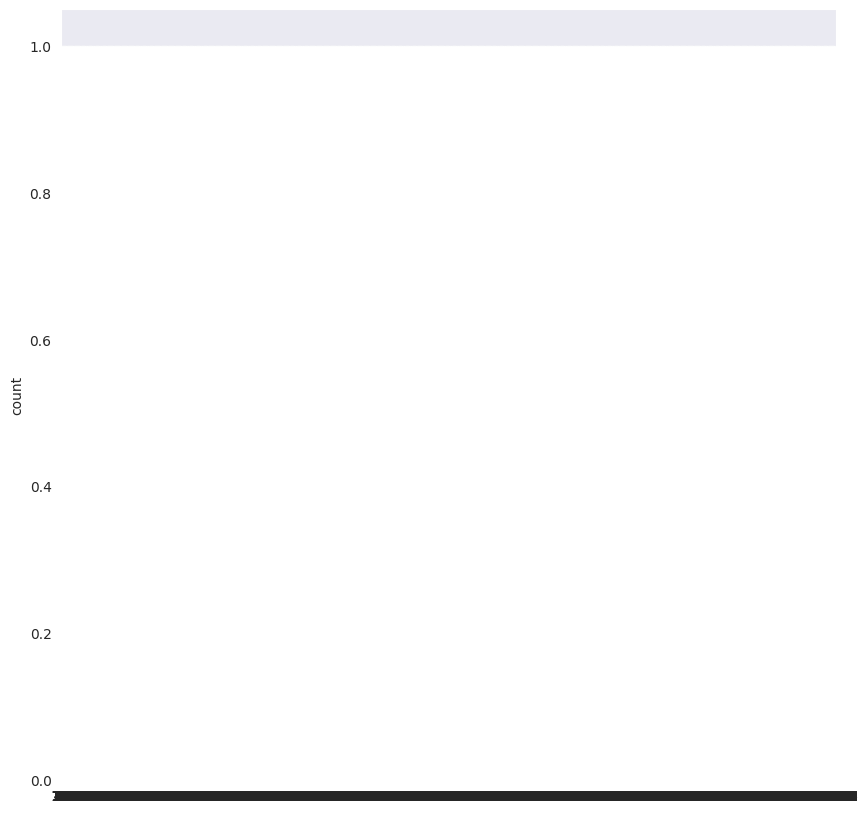

In [18]:
!pip install seaborn
import seaborn as sns    #making graphs look good.
import matplotlib.pyplot as plt #
import pandas as pd

plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")    #This makes the graph background a dark grid (for style)
sns.countplot(train['label'])

In [20]:
y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

In [21]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [23]:
x_train = train.values
x_test = test.values

In [24]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [25]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

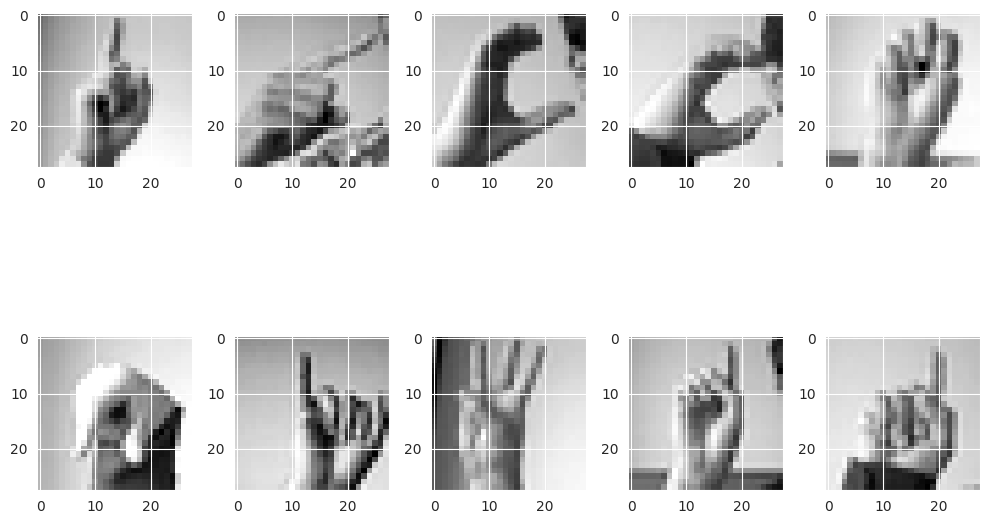

In [26]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [28]:
 !pip install tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [29]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [32]:
from tensorflow.keras.models import Sequential # Import Sequential from tensorflow.keras.models
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau # Importing ReduceLROnPlateau

# ... your existing code ...

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# Use a different variable name, for example 'cnn_model', to avoid conflict
cnn_model = Sequential()
cnn_model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cnn_model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cnn_model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512 , activation = 'relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(units = 24 , activation = 'softmax'))
cnn_model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau # Importing ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

In [39]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 75)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 75)          │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 75)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 50)          │          33,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 50)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 25)            │          11,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 7, 7, 25)            │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         205,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,049 (1.01 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

In [34]:
# Assuming 'cnn_model' is your Keras model defined in the previous cell
history = cnn_model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 30s 89ms/step - accuracy: 0.4544 - loss: 1.8679 - val_accuracy: 0.0891 - val_loss: 3.9320 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9028 - loss: 0.2863 - val_accuracy: 0.5209 - val_loss: 1.6997 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.9605 - loss: 0.1211 - val_accuracy: 0.9859 - val_loss: 0.0681 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.9757 - loss: 0.0765 - val_accuracy: 0.9105 - val_loss: 0.2552 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.9845 - loss: 0.0508 - val_accuracy: 0.9879 - val_loss: 0.0384 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.9857 - loss: 0.0431 - val_accuracy: 0.9936 - val_loss: 0.0195 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9905 - loss: 0.0322

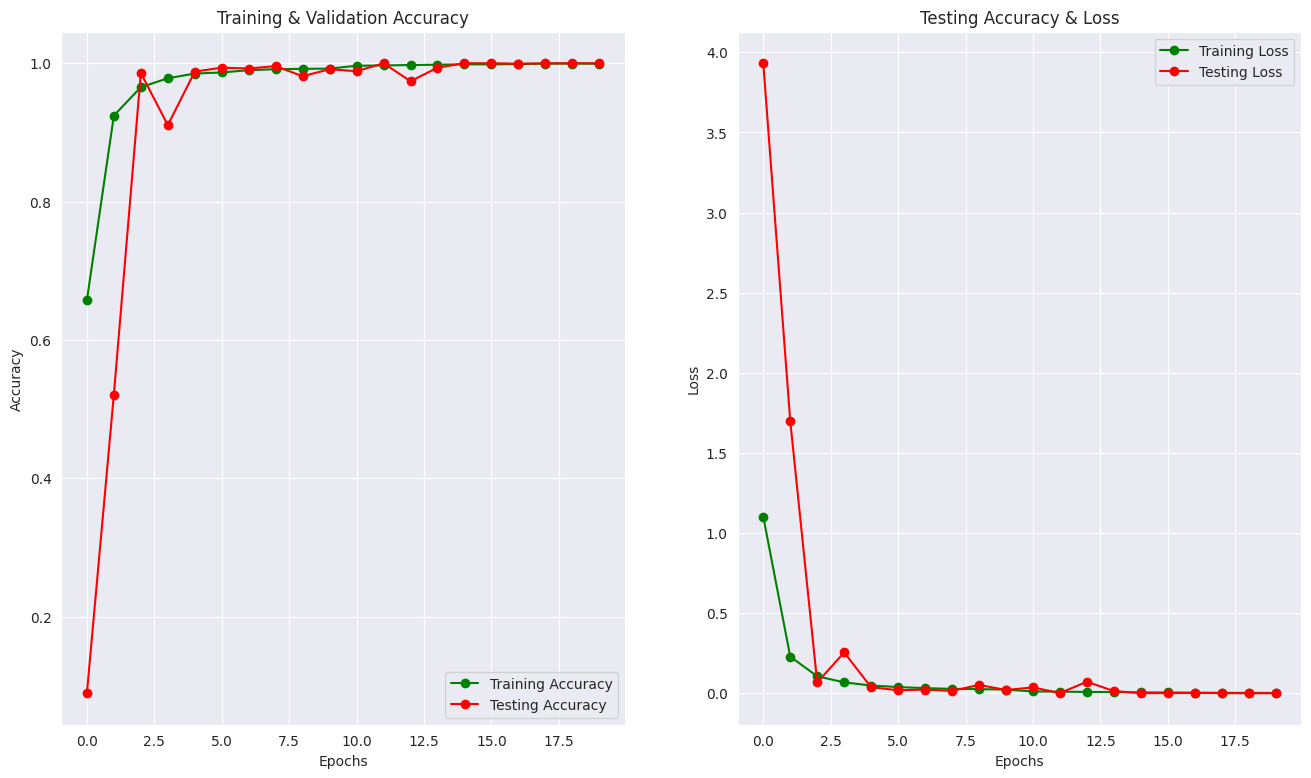

In [35]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [40]:
#predictions = model.predict(x_test)
predictions=np.argmax(model.predict(x_test), axis=1)
for i in range(len(predictions)):
    if(predictions[i].any() >= 9):
        predictions[i] += 1
predictions[:5]

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([5, 5, 5, 5, 5])

In [43]:
!pip install scikit-learn
from sklearn.metrics import classification_report
import numpy as np

# Assuming y_test is your one-hot encoded true labels for the test set
y_true = np.argmax(y_test, axis=1)

# Adjust predictions for classes greater than or equal to 9
predictions = np.argmax(model.predict(x_test), axis=1)
for i in range(len(predictions)):
    if predictions[i] >= 9:
        predictions[i] += 1

# Define the class names, excluding class 9
classes = ["Class " + str(i) for i in range(25) if i != 9]

# Generate the classification report
print(classification_report(y_true, predictions, labels=np.arange(0, len(classes), 1), target_names=classes))

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       331
     Class 1       0.00      0.00      0.00       432
     Class 2       0.00      0.00      0.00       310
     Class 3       0.00      0.00      0.00       245
     Class 4       0.00      0.00      0.00       498
     Class 5       0.03      1.00      0.07       247
     Class 6       0.00      0.00      0.00       348
     Class 7       0.00      0.00      0.00       436
     Class 8       0.00      0.00      0.00       288
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.00      0.00      0.00       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.00      0.00      0.00       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [45]:
!pip install scikit-learn
from sklearn.metrics import classification_report, confusion_matrix # Import confusion_matrix
import numpy as np

# Assuming y_test is your one-hot encoded true labels for the test set
y_true = np.argmax(y_test, axis=1)

# Adjust predictions for classes greater than or equal to 9
predictions = np.argmax(model.predict(x_test), axis=1)
for i in range(len(predictions)):
    if predictions[i] >= 9:
        predictions[i] += 1

cm = confusion_matrix(y_true, predictions) # Use y_true instead of y, assuming y_true contains the actual labels
print(cm)

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[  0   0   0   0   0 331   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 432   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 310   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 498   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 348   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 388   0   0   0   0   0   0   0   0   0   0  48   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 288   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 305   0   0   0   0   0   0 

<Axes: >

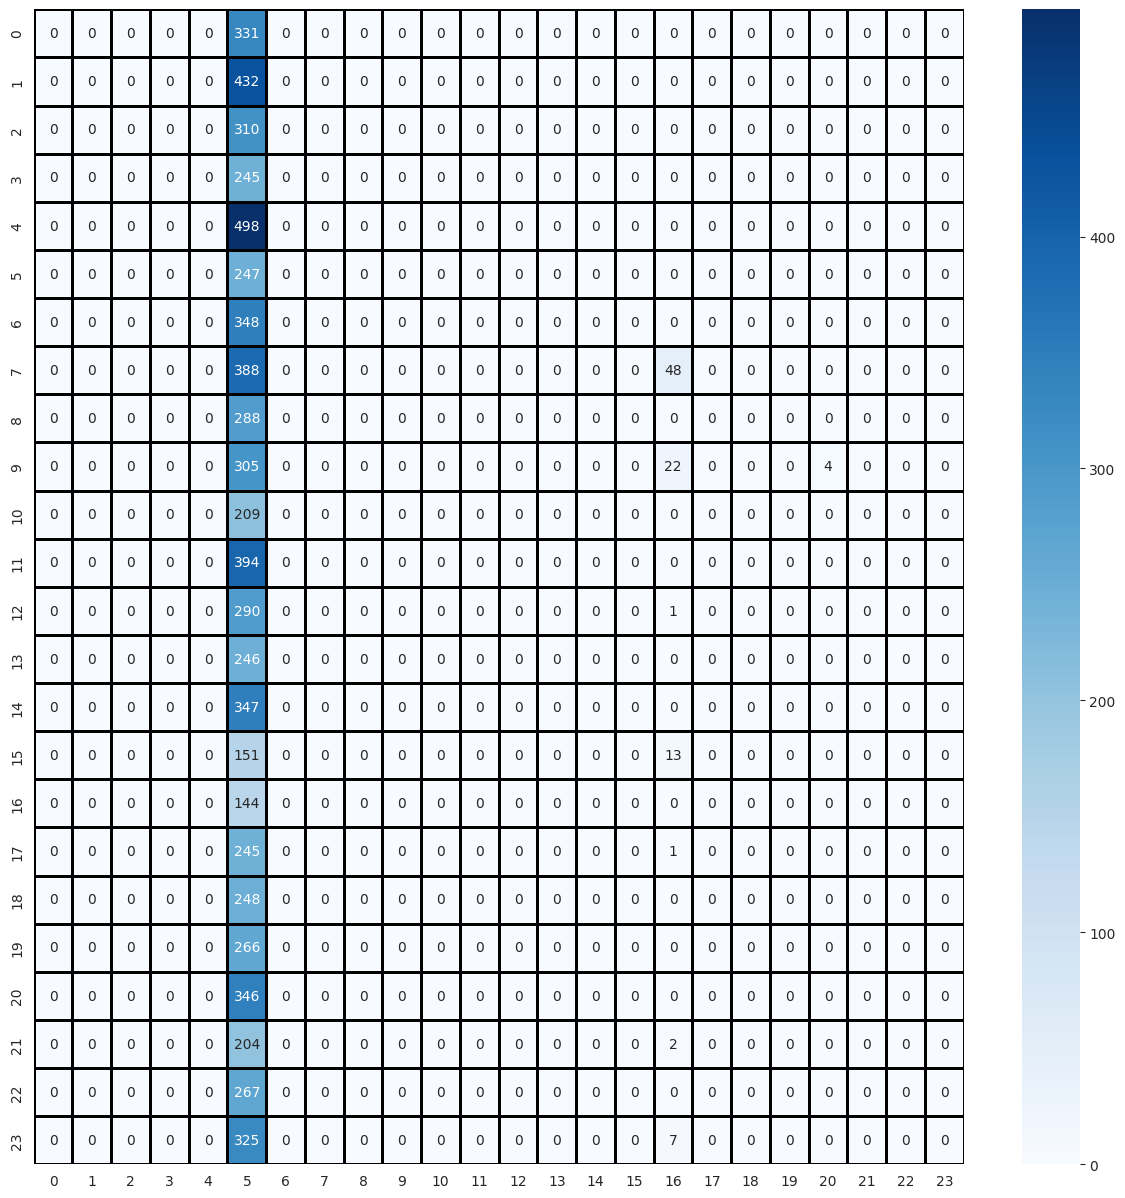

In [46]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [48]:
# Assuming 'y_test' is the one-hot encoded true labels for the test set
y_true = np.argmax(y_test, axis=1) # Convert one-hot to class labels

# Adjust predictions for classes greater than or equal to 9 (if needed)
# ... your existing prediction adjustment code ...

# Now compare predictions with the corresponding true labels for the test set
correct = np.nonzero(predictions == y_true)[0]

<ipython-input-49-65d3d49c5c14>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


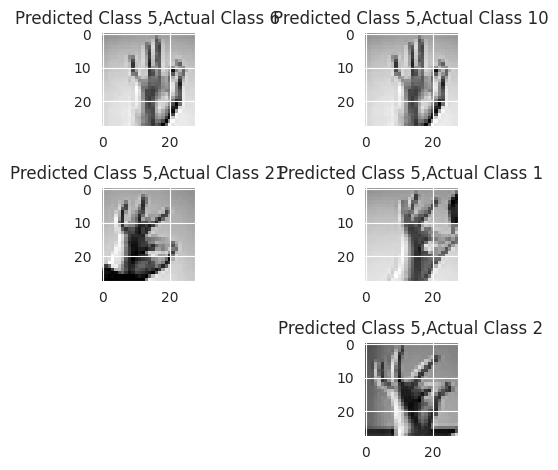

In [49]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1

In [16]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

NameError: name 'sns' is not defined

<Figure size 1000x1000 with 0 Axes>

In [6]:
X = train.drop(['label'], axis = 1)
y = train['label']

In [7]:
X.shape, y.shape

((27455, 784), (27455,))

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Hyperparameters

In [9]:
BATCH_SIZE = 32
IMAGE_SIZE = 28
NUM_CLASS = y.nunique() + 1

# Preprocessing and Data Loader

In [10]:
random_transforms = transforms.Compose([
    transforms.RandomRotation(30),  # Randomly rotate the image by up to 30 degrees
    # transforms.RandomResizedCrop(IMAGE_SIZE),  # Randomly crop and resize the image to 224x224
    # transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
])

# Define the fixed transformations
fixed_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Define the overall transformation pipeline
transform = transforms.Compose([
    transforms.RandomApply([random_transforms], p=0.5),  # Apply random transformations with a probability of 0.5
    fixed_transforms
])

In [11]:
class SignDataSet(Dataset):
  def __init__(
      self,
      image_df,
      label_df,
      transform,
      split = None,
  ):
    self.image_df = image_df
    self.label_df = torch.nn.functional.one_hot(torch.tensor(np.array(label_df))).float()
    self.split = split
    self.transform = transform

  def __len__(self):
    return len(self.label_df)

  def __getitem__(self, index):
    image = self.image_df.iloc[index]
    image = np.reshape(np.array(image), (28,28))

    image = Image.fromarray(image.astype(np.uint8))

    label = self.label_df[index]
    # label = torch.nn.functional.one_hot(torch.tensor(label))

    if self.split == 'train':
      image = self.transform(image)
    return image, label





In [12]:

train_data = SignDataSet(X_train, y_train, transform, 'train')
test_data = SignDataSet(X_val, y_val, transform)

In [13]:
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, drop_last = True)
test_loader = DataLoader(test_data, batch_size = BATCH_SIZE, drop_last = True)

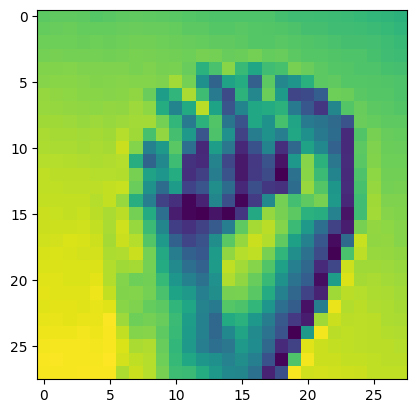

In [14]:
for i, j in train_data:
  temp_img = i

  plt.imshow(temp_img.permute(1,2,0))
  break

# Model Building

In [15]:
class SignLabelModel(nn.Module):
    def __init__(self, num_classes):
        super(SignLabelModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Create an instance of the model
  # Number of classes
model = SignLabelModel(NUM_CLASS).to(device)

In [ ]:
num_epochs = 20
criterion  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
for epoch in tqdm(range(num_epochs)):
    for i, (images, labels) in enumerate(train_loader):
        # Move images and labels to the device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images.to(device))
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print training progress
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training finished.")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch [1/20], Loss: 0.0658
Epoch [1/20], Loss: 0.2724
Epoch [1/20], Loss: 0.2633
Epoch [1/20], Loss: 0.1275
Epoch [1/20], Loss: 0.1453
Epoch [1/20], Loss: 0.1104


  5%|▌         | 1/20 [00:12<03:50, 12.11s/it]

Epoch [2/20], Loss: 0.1661
Epoch [2/20], Loss: 0.1278
Epoch [2/20], Loss: 0.1764
Epoch [2/20], Loss: 0.2534
Epoch [2/20], Loss: 0.2307
Epoch [2/20], Loss: 0.0386


 10%|█         | 2/20 [00:23<03:34, 11.94s/it]

Epoch [3/20], Loss: 0.0690
Epoch [3/20], Loss: 0.2340
Epoch [3/20], Loss: 0.1753
Epoch [3/20], Loss: 0.0758
Epoch [3/20], Loss: 0.1124
Epoch [3/20], Loss: 0.0213


 15%|█▌        | 3/20 [00:35<03:22, 11.92s/it]

Epoch [4/20], Loss: 0.0999
Epoch [4/20], Loss: 0.3457
Epoch [4/20], Loss: 0.2807
Epoch [4/20], Loss: 0.1919
Epoch [4/20], Loss: 0.1315
Epoch [4/20], Loss: 0.0663


 20%|██        | 4/20 [00:47<03:11, 11.99s/it]

Epoch [5/20], Loss: 0.0740
Epoch [5/20], Loss: 0.0681
Epoch [5/20], Loss: 0.0753
Epoch [5/20], Loss: 0.1335
Epoch [5/20], Loss: 0.0359
Epoch [5/20], Loss: 0.0640


 25%|██▌       | 5/20 [01:00<03:01, 12.08s/it]

Epoch [6/20], Loss: 0.0824
Epoch [6/20], Loss: 0.3208
Epoch [6/20], Loss: 0.1746
Epoch [6/20], Loss: 0.1462
Epoch [6/20], Loss: 0.0325
Epoch [6/20], Loss: 0.0166


 30%|███       | 6/20 [01:12<02:49, 12.11s/it]

Epoch [7/20], Loss: 0.0266
Epoch [7/20], Loss: 0.0698
Epoch [7/20], Loss: 0.1176
Epoch [7/20], Loss: 0.0971
Epoch [7/20], Loss: 0.0727
Epoch [7/20], Loss: 0.0162


 35%|███▌      | 7/20 [01:24<02:36, 12.07s/it]

Epoch [8/20], Loss: 0.1202
Epoch [8/20], Loss: 0.0308
Epoch [8/20], Loss: 0.2305
Epoch [8/20], Loss: 0.0595
Epoch [8/20], Loss: 0.0532
Epoch [8/20], Loss: 0.0617


 40%|████      | 8/20 [01:36<02:24, 12.07s/it]

Epoch [9/20], Loss: 0.0548
Epoch [9/20], Loss: 0.2174
Epoch [9/20], Loss: 0.0857
Epoch [9/20], Loss: 0.0317
Epoch [9/20], Loss: 0.0402
Epoch [9/20], Loss: 0.0114


 45%|████▌     | 9/20 [01:48<02:12, 12.04s/it]

Epoch [10/20], Loss: 0.1095
Epoch [10/20], Loss: 0.0566
Epoch [10/20], Loss: 0.0696
Epoch [10/20], Loss: 0.0521
Epoch [10/20], Loss: 0.0177
Epoch [10/20], Loss: 0.0366


 50%|█████     | 10/20 [02:00<02:00, 12.05s/it]

Epoch [11/20], Loss: 0.1117
Epoch [11/20], Loss: 0.0173
Epoch [11/20], Loss: 0.0519
Epoch [11/20], Loss: 0.0278
Epoch [11/20], Loss: 0.1070
Epoch [11/20], Loss: 0.0231


 55%|█████▌    | 11/20 [02:12<01:48, 12.03s/it]

Epoch [12/20], Loss: 0.0667
Epoch [12/20], Loss: 0.1846
Epoch [12/20], Loss: 0.0576
Epoch [12/20], Loss: 0.0531
Epoch [12/20], Loss: 0.0215
Epoch [12/20], Loss: 0.0326


 60%|██████    | 12/20 [02:24<01:35, 11.98s/it]

Epoch [13/20], Loss: 0.0168
Epoch [13/20], Loss: 0.0464
Epoch [13/20], Loss: 0.0739
Epoch [13/20], Loss: 0.0704
Epoch [13/20], Loss: 0.0531
Epoch [13/20], Loss: 0.0398


 65%|██████▌   | 13/20 [02:36<01:23, 11.95s/it]

Epoch [14/20], Loss: 0.0316
Epoch [14/20], Loss: 0.0414
Epoch [14/20], Loss: 0.0685
Epoch [14/20], Loss: 0.1667
Epoch [14/20], Loss: 0.0165
Epoch [14/20], Loss: 0.0066


 70%|███████   | 14/20 [02:48<01:11, 11.95s/it]

Epoch [15/20], Loss: 0.0273
Epoch [15/20], Loss: 0.0591
Epoch [15/20], Loss: 0.0187
Epoch [15/20], Loss: 0.0399
Epoch [15/20], Loss: 0.0506
Epoch [15/20], Loss: 0.0397


 75%|███████▌  | 15/20 [03:00<00:59, 11.96s/it]

Epoch [16/20], Loss: 0.0701
Epoch [16/20], Loss: 0.0747
Epoch [16/20], Loss: 0.0265
Epoch [16/20], Loss: 0.0180
Epoch [16/20], Loss: 0.0547
Epoch [16/20], Loss: 0.0278


 80%|████████  | 16/20 [03:11<00:47, 11.94s/it]

Epoch [17/20], Loss: 0.0774
Epoch [17/20], Loss: 0.1419
Epoch [17/20], Loss: 0.0338
Epoch [17/20], Loss: 0.0303
Epoch [17/20], Loss: 0.0251
Epoch [17/20], Loss: 0.0426


 85%|████████▌ | 17/20 [03:24<00:35, 11.99s/it]

Epoch [18/20], Loss: 0.1617
Epoch [18/20], Loss: 0.0936
Epoch [18/20], Loss: 0.0481
Epoch [18/20], Loss: 0.0486
Epoch [18/20], Loss: 0.0931
Epoch [18/20], Loss: 0.0111


 90%|█████████ | 18/20 [03:36<00:23, 11.97s/it]

Epoch [19/20], Loss: 0.1165
Epoch [19/20], Loss: 0.1108
Epoch [19/20], Loss: 0.0284
Epoch [19/20], Loss: 0.0708
Epoch [19/20], Loss: 0.0253
Epoch [19/20], Loss: 0.0037


 95%|█████████▌| 19/20 [03:48<00:11, 11.98s/it]

Epoch [20/20], Loss: 0.0214
Epoch [20/20], Loss: 0.0849
Epoch [20/20], Loss: 0.0236
Epoch [20/20], Loss: 0.0095
Epoch [20/20], Loss: 0.0024
Epoch [20/20], Loss: 0.0082


100%|██████████| 20/20 [03:59<00:00, 12.00s/it]

Training finished.
